In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
#reading the dataset

data = pd.read_csv("adult_salary.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


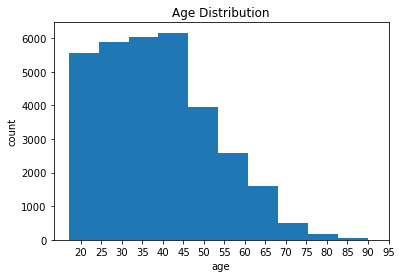

In [4]:
#check age distribution

plt.hist(data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (8,4)
plt.xticks(np.arange(20,100,5))
plt.title('Age Distribution')
plt.show()

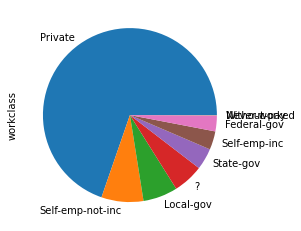

In [5]:
#check working class

data['workclass'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (8,10)
plt.show()

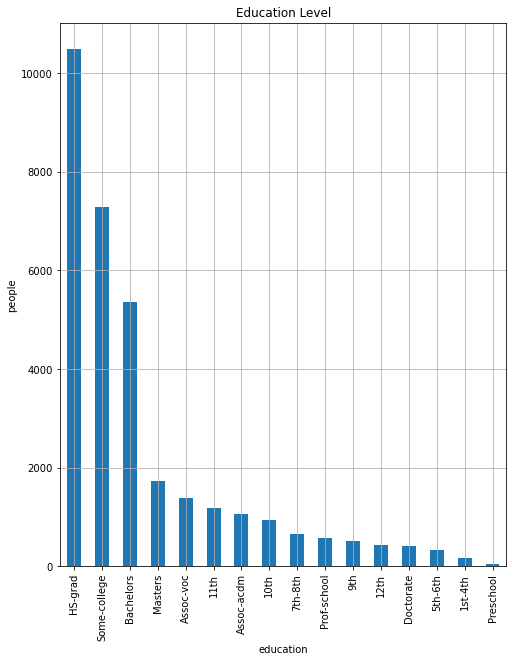

In [6]:
#check education

data['education'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (3,4)
plt.xlabel('education')
plt.ylabel('people')
plt.title('Education Level')
plt.grid()
plt.show()

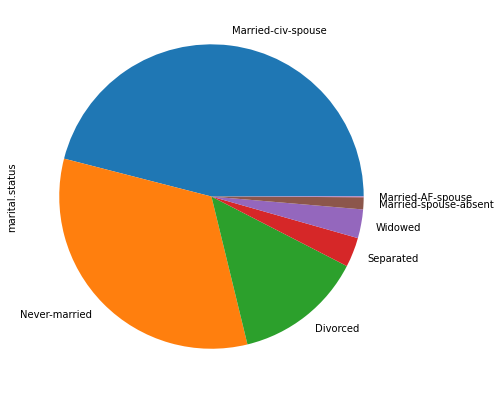

In [8]:
#check marital status

data['marital.status'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

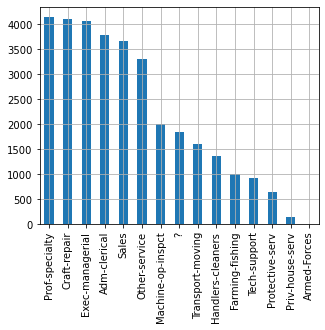

In [21]:
#checking occupation

data['occupation'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (6,4)
plt.grid()
plt.show()

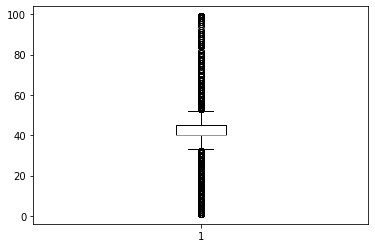

In [23]:
#check working hours

plt.boxplot(data['hours.per.week'])
plt.show()

# Preprocessing

In [25]:
# dropping the 'education' column because it is already mapped using 'education.num'. So there is need to encode that column

data.drop('education', axis =1, inplace=True)

### Missing Value

In [26]:
#finding any missing values in the dataset using the isna() function

data.isna()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
#to get the sum of number of missing values in each columns
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [28]:
# isna() is showing there's no missing value but still there's missing values in the dataset
# the missing values are denoted using ? marks.

data.isin(['?'])


,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# sum ups the number of question marks in each column

data.isin(['?']).sum()

#3 of the columns have missing values, and all the 3 columns are categorical so can't use mean imputing

age                  0
workclass         1836
fnlwgt               0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [30]:
# finding the unique values of the columns having missing values

data['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

There is no order in the column so it is good for 'One Hot Encoding'

In [31]:
data['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

There is also no order between the values

In [32]:
data['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

It is also a nomial feature i.e, there is no order between the values

In [33]:
#replace the ? marks with numpy NaN values

data = data.replace('?',np.NaN)

In [34]:
data.head(10)

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


 now the NaN values will be taken care of when Encoding

### Encoding

In [35]:
# only need to encode the categorical features, not the numerical features.
# making a list of categorical features 

categorical_features = ['workclass','marital.status','occupation','relationship','race','sex','native.country']

In [36]:
#function for finding the unique values for each categorical columns

def get_uniques(df, columns):
    uniques = dict()
    for column in columns:
        uniques[column] = list(df[column].unique())
    return uniques

In [37]:
get_uniques(data, categorical_features)

{'workclass': [nan,
  'Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay',
  'Never-worked'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': [nan,
  'Exec-managerial',
  'Machine-op-inspct',
  'Prof-specialty',
  'Other-service',
  'Adm-clerical',
  'Craft-repair',
  'Transport-moving',
  'Handlers-cleaners',
  'Sales',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Other',
  'Amer-Indian-Eskimo'],
 'sex': ['Female', 'Male'],
 'native.country': ['United-States',
  nan,
  'Mexico',
  'Greece',
  'Vietnam',
  'China',
  'Taiwan',
  'India',
  'Philippines',
  'Trinadad&Tobago',
  'Canada',
  

In [38]:
#create lists for binary features and nominal features

binary_features = ['sex']

nominal_features = ['workclass','marital.status','occupation','relationship','race','native.country']

In [39]:
#this function (binary_encode) will take the label_encoder object then fit it to the data i.e df[column] and transform the data and it will return back to the original column

def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df
 
    
# this function will create the dummy columns and store it in the dummies variable, then concatenate the original data frame with the dummies along the column axis.
# now we'll get new features and then drops the original column that we got the dummies from.

def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis = 1)
        df.drop(column, axis = 1, inplace = True)
    return df

In [40]:
data = binary_encode(data, binary_features)
data = onehot_encode(data, nominal_features)

In [41]:
data

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,90,77053,9,0,0,4356,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,0,4356,18,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,0,4356,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,0,3900,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,0,3900,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,1,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
#checking if there is anymore string column - the label column is still not encoded ie, the income column
(data.dtypes == 'object').sum()  

1

### Scaling

In [43]:
y = data['income']
X =data.drop('income', axis = 1)

In [44]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [45]:
#using labelencoder to encode y

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
y_mappings

{0: '<=50K', 1: '>50K'}

In [46]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
#scaling the data

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [48]:
X

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1.000000,0.043987,0.533333,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.081896,0.533333,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.118021,0.600000,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.086982,0.200000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.171404,0.600000,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.136986,0.166404,0.733333,0.0,0.0,0.000000,0.377551,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.315068,0.096500,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.561644,0.094827,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Training

In [58]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)

In [59]:
#using ensor flow neural network to model

inputs = tf.keras.Input(shape=(88)) #input layer of the neural network, shape is the number of features in the dataset (columns = 88
x = tf.keras.layers.Dense(16, activation = 'relu')(inputs)  #fully connected layer for the input 16 nodes and relu as activation
x = tf.keras.layers.Dense(16, activation = 'relu')(x)   #doing the same for the next layer too
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)  #output layer, 1 because it's a binary classification problem. Sigmoid is best for binary classification.

model = tf.keras.Model(inputs = inputs, outputs = outputs) #model will take the inputs and outputs as specified


optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

metrics =[
    
    tf.keras.metrics.BinaryAccuracy(name='acc'), #we'll get the accuracy
    tf.keras.metrics.AUC(name='auc') #and area under the curve(AUC)
    
    ]
    
#compiling the model

model.compile(
    optimizer = optimizer,
    loss = 'binary_crossentropy',
    metrics = metrics
)

#fitting the model 

batch_size = 32
epochs = 100    #first it was epochs = 100

#restoring the fit history in the history object

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 0
)

# Results

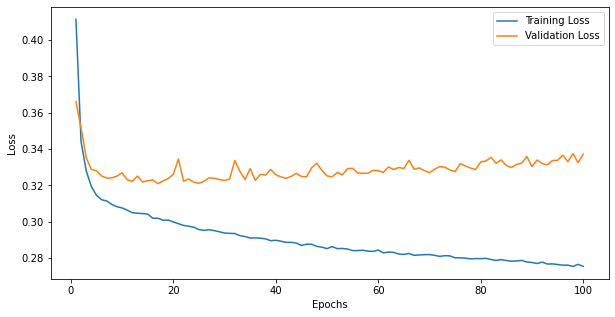

In [60]:
#plotting the results

plt.figure(figsize=(10,5))  #setting the figure size

#setting the x-axis and y-axis values
#x-axis = epochs_range
#y-axis = train_loss and validation loss over epochs_range

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

#plotting two graphs
plt.plot(epochs_range, train_loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

When the epochs = 100 , the taining loss and the validation loss is going down and at some point the training loss continue to decrease and the validation loss continue to increase.
And this is because the model starts to overfitting, because when we train a model for so long it will starts to overfit because it starts to memorize the dataset.

And that makes the prediction worse for unseen data and better for seen data.



In [52]:
#finding the lesser number of epochs that should be used to train the model to get the lowest possible validation loss.

np.argmin(val_loss)

14

Now we change the epochs value to 20 in the training. In the beginning it was trained with epochs = 100

In [53]:
#evaluating the model on the test set

model.evaluate(X_test, y_test)

204/204 [==============================] - 0s 2ms/step - loss: 0.3269 - acc: 0.8544 - auc: 0.9057


[0.3269197344779968, 0.8544449806213379, 0.9056940674781799]

Got an AUC value of 90% and that means the model is very good at classifying.



In [54]:
#not considering the accuracy because

y.sum()

7841

There are 7841 1's in the y label and if we divide it by the total number ie, 

In [55]:
y.sum() / len(y)

0.2408095574460244

There's only 24% of the values are positively labelled. So accuracy is not concerned because "accuracy" only check whether the model classify the total number of correct over total number